In [24]:
import pandas as pd
import requests

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

# 유저 데이터 불러오기

### 유저 아바타 데이터

In [25]:
data1 = pd.read_csv("output1.csv")
data2 = pd.read_csv("output2.csv")
data3 = pd.read_csv("output3.csv")

data = pd.concat([data1,data2,data3], ignore_index=True)

del data1, data2, data3

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7068\2718127190.py:1: DtypeWarning: Columns (124,125,219,220) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv("output1.csv")
C:\Users\Administrator\AppData\Local\Temp\ipykernel_7068\2718127190.py:3: DtypeWarning: Columns (124,125,148,149,219,220) have mixed types. Specify dtype option on import or set low_memory=False.
  data3 = pd.read_csv("output3.csv")


In [26]:
len(data)

90600

### 유저 데이터(명성 순)

In [27]:
user1 = pd.read_csv("user1.csv")
user2 =pd.read_csv("user2.csv")
user3 =pd.read_csv("user3.csv")

user = pd.concat([user1,user2,user3],ignore_index=True)
del user1,user2,user3

In [28]:
len(user)

90600

# 전처리

### 필요한 컬럼 추출

In [29]:
data = data[['characterId',
'characterName',
'jobId',
'jobName',

'HEADGEAR__avatar_slotId',
'HEADGEAR__avatar_slotName',
'HEADGEAR__avatar_itemId',
'HEADGEAR__avatar_itemName',
'HEADGEAR__avatar_clone_itemId',
'HEADGEAR__avatar_clone_itemName',

'HAIR__avatar_slotId',
'HAIR__avatar_slotName',
'HAIR__avatar_itemId',
'HAIR__avatar_itemName',
'HAIR__avatar_clone_itemId',
'HAIR__avatar_clone_itemName',

'FACE__avatar_slotId',
'FACE__avatar_slotName',
'FACE__avatar_itemId',
'FACE__avatar_itemName',
'FACE__avatar_clone_itemId',
'FACE__avatar_clone_itemName',

'JACKET__avatar_slotId',
'JACKET__avatar_slotName',
'JACKET__avatar_itemId',
'JACKET__avatar_itemName',
'JACKET__avatar_clone_itemId',
'JACKET__avatar_clone_itemName',

'PANTS__avatar_slotId',
'PANTS__avatar_slotName',
'PANTS__avatar_itemId',
'PANTS__avatar_itemName',
'PANTS__avatar_clone_itemId',
'PANTS__avatar_clone_itemName',

'SHOES__avatar_slotId',
'SHOES__avatar_slotName',
'SHOES__avatar_itemId',
'SHOES__avatar_itemName',
'SHOES__avatar_clone_itemId',
'SHOES__avatar_clone_itemName',

'BREAST__avatar_slotId',
'BREAST__avatar_slotName',
'BREAST__avatar_itemId',
'BREAST__avatar_itemName',
'BREAST__avatar_clone_itemId',
'BREAST__avatar_clone_itemName',

'WAIST__avatar_slotId',
'WAIST__avatar_slotName',
'WAIST__avatar_itemId',
'WAIST__avatar_itemName',
'WAIST__avatar_clone_itemId',
'WAIST__avatar_clone_itemName',

'SKIN__avatar_slotId',
'SKIN__avatar_slotName',
'SKIN__avatar_itemId',
'SKIN__avatar_itemName',
'SKIN__avatar_clone_itemId',
'SKIN__avatar_clone_itemName',

'AURORA__avatar_slotId',
'AURORA__avatar_slotName',
'AURORA__avatar_itemId',
'AURORA__avatar_itemName',
'AURORA__avatar_clone_itemId',
'AURORA__avatar_clone_itemName',

'WEAPON__avatar_slotId',
'WEAPON__avatar_slotName',
'WEAPON__avatar_itemId',
'WEAPON__avatar_itemName',
'WEAPON__avatar_clone_itemId',
'WEAPON__avatar_clone_itemName',

'AURA_SKIN__avatar_slotId',
'AURA_SKIN__avatar_slotName',
'AURA_SKIN__avatar_itemId',
'AURA_SKIN__avatar_itemName',
'AURA_SKIN__avatar_clone_itemId',
'AURA_SKIN__avatar_clone_itemName']]

data

,characterId,characterName,jobId,jobName,HEADGEAR__avatar_slotId,HEADGEAR__avatar_slotName,HEADGEAR__avatar_itemId,HEADGEAR__avatar_itemName,HEADGEAR__avatar_clone_itemId,HEADGEAR__avatar_clone_itemName,...,WEAPON__avatar_itemId,WEAPON__avatar_itemName,WEAPON__avatar_clone_itemId,WEAPON__avatar_clone_itemName,AURA_SKIN__avatar_slotId,AURA_SKIN__avatar_slotName,AURA_SKIN__avatar_itemId,AURA_SKIN__avatar_itemName,AURA_SKIN__avatar_clone_itemId,AURA_SKIN__avatar_clone_itemName
0,150a23219a59e086e36db59028c06a50,헤롱카테,3909d0b188e9c95311399f776e331da5,마법사(여),HEADGEAR,모자 아바타,aebd9700b2de7be3fc909f89f8cfffce,레어 모자 클론 아바타,14d18062b175b136d7ef6f1db407f58d,던파스쿨 고양이 머리띠[A타입],...,e16f404ee01406d159987f41abd99118,레어 무기 클론 아바타[40Lv],e5f9d8f370765a3496f0b3ef189a0e7f,포식의 욕망,AURA_SKIN,오라 스킨 아바타,d1bb79f2380a3375cb7a473246053ffa,★미쿠와 함께★,NaN,NaN
1,0daa8c49cae531262f966dd637008e30,민트크림소스,3909d0b188e9c95311399f776e331da5,마법사(여),HEADGEAR,모자 아바타,d73b5d96d17c84e54ff2a999658a4845,레어 모자 클론 아바타,9b676223df861e8932d01fa8be03dd6a,아라드 해변 리본 모자[C타입],...,6f664071d276072fdc25371252816989,레어 무기 클론 아바타[75Lv],f742d25f8e25513de703149cbd432e65,엘프 여왕의 정령,AURA_SKIN,오라 스킨 아바타,4754847cc0c85ffbcc6bd108e9207f6c,모험단 모션 오라 아바타,2fd6865377f6563035def5de26f489b7,해방된 요기 오라
2,103e5c925e8a698e89abd4d68cce1d0e,스팅거타이거,afdf3b989339de478e85b614d274d1ef,거너(남),HEADGEAR,모자 아바타,80c6a6b7b5c1ab32bb401dfadf76ace8,레어 모자 클론 아바타,89f6c4947ec18a4b0aab705b0e93b3a1,진 메카닉의 헤드폰[B타입],...,dd013289916783dddc5a90f378682e40,레어 무기 클론 아바타[80Lv],d58731378b57cdcd957614255173424a,던전앤파이터 클래식 캐논,AURA_SKIN,오라 스킨 아바타,3baabfc239dd420d0b6673c7b1426391,푸른빛 홀로그램,NaN,NaN
3,3ba38c77f2868f34d910e362d0f4cae1,프라디지,41f1cdc2ff58bb5fdc287be0db2a8df3,귀검사(남),HEADGEAR,모자 아바타,3bd48b7a41985ad02bd07ec91dcf04a8,레어 모자 클론 아바타,995900bb5ded1b28e387a0e709572fae,부러진 악마의 블랙 혼,...,7b0532818737be0b0e6f1e2c4042cf60,레어 무기 클론 아바타[75Lv],a6f732dc2f3fa8ef24a420cca2ca5aa2,명도 후구도쿠,AURA_SKIN,오라 스킨 아바타,025ff1f20ce27272539704aedb878ac1,연옥의 불길,NaN,NaN
4,79a62ecc85e602ae7f13b79b766aa2ee,금요일야근,0c1b401bb09241570d364420b3ba3fd7,프리스트(여),HEADGEAR,모자 아바타,4073653019b52f859d27c96265c0b0a3,레어 모자 클론 아바타,NaN,NaN,...,f99c56e62fa39e93ec0f1fe793ccf05c,레어 무기 클론 아바타[45Lv],6723b14653bc97f521e990439b3bad77,이면 1활 삼뢰의 포진,AURA_SKIN,오라 스킨 아바타,f99513274bbef4290a1379c223933338,조화가 무너진 기억,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90595,5c37706a64742ce164d02b06456ec3d9,윤아에용,a7a059ebe9e6054c0644b40ef316d6e9,격투가(여),HEADGEAR,모자 아바타,b8c1f046fe4fe0677f19195385d19b04,레어 모자 클론 아바타,53d334dc1641cd3f4605908bcaa89960,진 스트라이커의 거친 후드[A타입],...,5c94117f7b5b2232b776011cfa42579e,무기 클론 아바타,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90596,030f2b2ee126aec10bd0108c13b493c6,잿빛의시프,41f1cdc2ff58bb5fdc287be0db2a8df3,귀검사(남),HEADGEAR,모자 아바타,3bd48b7a41985ad02bd07ec91dcf04a8,레어 모자 클론 아바타,711ee1f368e0e83f29d33f2b06bd4994,야생의 사파리 사모예드의 탈[A타입],...,ccde39545f0f69b26e9f6b23f41751a0,레어 무기 클론 아바타[70Lv],NaN,NaN,AURA_SKIN,오라 스킨 아바타,f99513274bbef4290a1379c223933338,조화가 무너진 기억,NaN,NaN
90597,c51246ee43ee7645995bdf8f2ee1a26f,저주거미,3909d0b188e9c95311399f776e331da5,마법사(여),HEADGEAR,모자 아바타,92d9839ad426f31e9de3508d001f84ca,레어 모자 클론 아바타,72747b638f523948042eb783d4704bc2,아사미야 아테나의 모자[E타입],...,e16f404ee01406d159987f41abd99118,레어 무기 클론 아바타[40Lv],0a67f9043419e9684ca9693a2735cd6f,샤이닝 크리스탈 비트,AURA_SKIN,오라 스킨 아바타,f99513274bbef4290a1379c223933338,조화가 무너진 기억,NaN,NaN
90598,9c068b798696f994d39b14a0840abb10,찌뮤,b9cb48777665de22c006fabaf9a560b3,아처,HEADGEAR,모자 아바타,2defdc2422ff3c61f5ac1af583e79459,레어 모자 클론 아바타,c5e50a3ea8f71aed447cb461a585c034,차원의 별자리 리본 베레모[E타입],...,f17318c539c39d6b6505462c13acc733,레어 무기 클론 아바타[60Lv],NaN,NaN,AURA_SKIN,오라 스킨 아바타,f99513274bbef4290a1379c223933338,조화가 무너진 기억,NaN,NaN


In [30]:
user = user[['serverId','characterId','characterName','fame']]
user

,serverId,characterId,characterName,fame
0,anton,150a23219a59e086e36db59028c06a50,헤롱카테,66993
1,hilder,0daa8c49cae531262f966dd637008e30,민트크림소스,66787
2,anton,103e5c925e8a698e89abd4d68cce1d0e,스팅거타이거,66702
3,prey,3ba38c77f2868f34d910e362d0f4cae1,프라디지,66666
4,diregie,79a62ecc85e602ae7f13b79b766aa2ee,금요일야근,66660
...,...,...,...,...
90595,hilder,5c37706a64742ce164d02b06456ec3d9,윤아에용,60468
90596,cain,030f2b2ee126aec10bd0108c13b493c6,잿빛의시프,60468
90597,prey,c51246ee43ee7645995bdf8f2ee1a26f,저주거미,60468
90598,prey,9c068b798696f994d39b14a0840abb10,찌뮤,60468


In [31]:
df = pd.concat([data,user[['serverId','fame']]], axis=1)

In [32]:
df

,characterId,characterName,jobId,jobName,HEADGEAR__avatar_slotId,HEADGEAR__avatar_slotName,HEADGEAR__avatar_itemId,HEADGEAR__avatar_itemName,HEADGEAR__avatar_clone_itemId,HEADGEAR__avatar_clone_itemName,...,WEAPON__avatar_clone_itemId,WEAPON__avatar_clone_itemName,AURA_SKIN__avatar_slotId,AURA_SKIN__avatar_slotName,AURA_SKIN__avatar_itemId,AURA_SKIN__avatar_itemName,AURA_SKIN__avatar_clone_itemId,AURA_SKIN__avatar_clone_itemName,serverId,fame
0,150a23219a59e086e36db59028c06a50,헤롱카테,3909d0b188e9c95311399f776e331da5,마법사(여),HEADGEAR,모자 아바타,aebd9700b2de7be3fc909f89f8cfffce,레어 모자 클론 아바타,14d18062b175b136d7ef6f1db407f58d,던파스쿨 고양이 머리띠[A타입],...,e5f9d8f370765a3496f0b3ef189a0e7f,포식의 욕망,AURA_SKIN,오라 스킨 아바타,d1bb79f2380a3375cb7a473246053ffa,★미쿠와 함께★,NaN,NaN,anton,66993
1,0daa8c49cae531262f966dd637008e30,민트크림소스,3909d0b188e9c95311399f776e331da5,마법사(여),HEADGEAR,모자 아바타,d73b5d96d17c84e54ff2a999658a4845,레어 모자 클론 아바타,9b676223df861e8932d01fa8be03dd6a,아라드 해변 리본 모자[C타입],...,f742d25f8e25513de703149cbd432e65,엘프 여왕의 정령,AURA_SKIN,오라 스킨 아바타,4754847cc0c85ffbcc6bd108e9207f6c,모험단 모션 오라 아바타,2fd6865377f6563035def5de26f489b7,해방된 요기 오라,hilder,66787
2,103e5c925e8a698e89abd4d68cce1d0e,스팅거타이거,afdf3b989339de478e85b614d274d1ef,거너(남),HEADGEAR,모자 아바타,80c6a6b7b5c1ab32bb401dfadf76ace8,레어 모자 클론 아바타,89f6c4947ec18a4b0aab705b0e93b3a1,진 메카닉의 헤드폰[B타입],...,d58731378b57cdcd957614255173424a,던전앤파이터 클래식 캐논,AURA_SKIN,오라 스킨 아바타,3baabfc239dd420d0b6673c7b1426391,푸른빛 홀로그램,NaN,NaN,anton,66702
3,3ba38c77f2868f34d910e362d0f4cae1,프라디지,41f1cdc2ff58bb5fdc287be0db2a8df3,귀검사(남),HEADGEAR,모자 아바타,3bd48b7a41985ad02bd07ec91dcf04a8,레어 모자 클론 아바타,995900bb5ded1b28e387a0e709572fae,부러진 악마의 블랙 혼,...,a6f732dc2f3fa8ef24a420cca2ca5aa2,명도 후구도쿠,AURA_SKIN,오라 스킨 아바타,025ff1f20ce27272539704aedb878ac1,연옥의 불길,NaN,NaN,prey,66666
4,79a62ecc85e602ae7f13b79b766aa2ee,금요일야근,0c1b401bb09241570d364420b3ba3fd7,프리스트(여),HEADGEAR,모자 아바타,4073653019b52f859d27c96265c0b0a3,레어 모자 클론 아바타,NaN,NaN,...,6723b14653bc97f521e990439b3bad77,이면 1활 삼뢰의 포진,AURA_SKIN,오라 스킨 아바타,f99513274bbef4290a1379c223933338,조화가 무너진 기억,NaN,NaN,diregie,66660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90595,5c37706a64742ce164d02b06456ec3d9,윤아에용,a7a059ebe9e6054c0644b40ef316d6e9,격투가(여),HEADGEAR,모자 아바타,b8c1f046fe4fe0677f19195385d19b04,레어 모자 클론 아바타,53d334dc1641cd3f4605908bcaa89960,진 스트라이커의 거친 후드[A타입],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hilder,60468
90596,030f2b2ee126aec10bd0108c13b493c6,잿빛의시프,41f1cdc2ff58bb5fdc287be0db2a8df3,귀검사(남),HEADGEAR,모자 아바타,3bd48b7a41985ad02bd07ec91dcf04a8,레어 모자 클론 아바타,711ee1f368e0e83f29d33f2b06bd4994,야생의 사파리 사모예드의 탈[A타입],...,NaN,NaN,AURA_SKIN,오라 스킨 아바타,f99513274bbef4290a1379c223933338,조화가 무너진 기억,NaN,NaN,cain,60468
90597,c51246ee43ee7645995bdf8f2ee1a26f,저주거미,3909d0b188e9c95311399f776e331da5,마법사(여),HEADGEAR,모자 아바타,92d9839ad426f31e9de3508d001f84ca,레어 모자 클론 아바타,72747b638f523948042eb783d4704bc2,아사미야 아테나의 모자[E타입],...,0a67f9043419e9684ca9693a2735cd6f,샤이닝 크리스탈 비트,AURA_SKIN,오라 스킨 아바타,f99513274bbef4290a1379c223933338,조화가 무너진 기억,NaN,NaN,prey,60468
90598,9c068b798696f994d39b14a0840abb10,찌뮤,b9cb48777665de22c006fabaf9a560b3,아처,HEADGEAR,모자 아바타,2defdc2422ff3c61f5ac1af583e79459,레어 모자 클론 아바타,c5e50a3ea8f71aed447cb461a585c034,차원의 별자리 리본 베레모[E타입],...,NaN,NaN,AURA_SKIN,오라 스킨 아바타,f99513274bbef4290a1379c223933338,조화가 무너진 기억,NaN,NaN,prey,60468


In [33]:
df.columns

Index(['characterId', 'characterName', 'jobId', 'jobName',
       'HEADGEAR__avatar_slotId', 'HEADGEAR__avatar_slotName',
       'HEADGEAR__avatar_itemId', 'HEADGEAR__avatar_itemName',
       'HEADGEAR__avatar_clone_itemId', 'HEADGEAR__avatar_clone_itemName',
       'HAIR__avatar_slotId', 'HAIR__avatar_slotName', 'HAIR__avatar_itemId',
       'HAIR__avatar_itemName', 'HAIR__avatar_clone_itemId',
       'HAIR__avatar_clone_itemName', 'FACE__avatar_slotId',
       'FACE__avatar_slotName', 'FACE__avatar_itemId', 'FACE__avatar_itemName',
       'FACE__avatar_clone_itemId', 'FACE__avatar_clone_itemName',
       'JACKET__avatar_slotId', 'JACKET__avatar_slotName',
       'JACKET__avatar_itemId', 'JACKET__avatar_itemName',
       'JACKET__avatar_clone_itemId', 'JACKET__avatar_clone_itemName',
       'PANTS__avatar_slotId', 'PANTS__avatar_slotName',
       'PANTS__avatar_itemId', 'PANTS__avatar_itemName',
       'PANTS__avatar_clone_itemId', 'PANTS__avatar_clone_itemName',
       'SHOES__avatar

In [34]:
del user, data

### 캐릭터 정보(캐릭터ID, 캐릭터 이름) 결측 데이터 확인 후 제거

In [35]:
df['serverId'].isnull().sum()

0

In [36]:
df['characterId'].isnull().sum()

2

In [37]:
df['characterName'].isnull().sum()

2

In [38]:
for x,y  in enumerate(df['characterId'].isnull()):
    if y:
        print(x)

20141
78245


In [39]:
df.iloc[20141,]

characterId                           NaN
characterName                         NaN
jobId                                 NaN
jobName                               NaN
HEADGEAR__avatar_slotId               NaN
                                    ...  
AURA_SKIN__avatar_itemName            NaN
AURA_SKIN__avatar_clone_itemId        NaN
AURA_SKIN__avatar_clone_itemName      NaN
serverId                             cain
fame                                61963
Name: 20141, Length: 78, dtype: object

In [40]:
df.iloc[78245,]

characterId                             NaN
characterName                           NaN
jobId                                   NaN
jobName                                 NaN
HEADGEAR__avatar_slotId                 NaN
                                     ...   
AURA_SKIN__avatar_itemName              NaN
AURA_SKIN__avatar_clone_itemId          NaN
AURA_SKIN__avatar_clone_itemName        NaN
serverId                            diregie
fame                                  60619
Name: 78245, Length: 78, dtype: object

In [41]:
# 2건 삭제
df.drop([20141,78245], axis=0, inplace=True)

###  캐릭터 중복 데이터 삭제

In [42]:
df.duplicated(['characterId']).sum()

9056

In [43]:
df.duplicated(['characterId', 'serverId']).sum()

9009

In [44]:
df.duplicated().sum()

9004

In [45]:
user_avatar_table = df.drop_duplicates(subset = ['characterId', 'serverId'] , keep = 'first' ,ignore_index = True)

In [46]:
# for i,col in enumerate(data.columns):
#     if str(data.loc[60382, col])==str(data.loc[60419,col]):
#         #print('c')
#         pass
#     else:
#         print(col)

In [47]:
temp_a = list(df.duplicated(['characterId', 'serverId']))
temp_b = list(df.duplicated())
n=0
dup_list=[]
for i in tqdm(range(len(df))):
    if temp_a[i] == temp_b[i]:
        n+=1
    else:
        # print(temp_a[i])
        # print(temp_b[i])
        print(i)
        dup_list.append(i)

100%|██████████| 90598/90598 [00:00<00:00, 3057108.70it/s]

37117
41865
57255
60418
68846


In [48]:
# for i,idx in enumerate(dup_list):
#     print(user[user['characterId']==user.loc[idx,'characterId']])
#     print('\n')


In [49]:
df[df['characterId']==df.loc[37117,'characterId']]

,characterId,characterName,jobId,jobName,HEADGEAR__avatar_slotId,HEADGEAR__avatar_slotName,HEADGEAR__avatar_itemId,HEADGEAR__avatar_itemName,HEADGEAR__avatar_clone_itemId,HEADGEAR__avatar_clone_itemName,...,WEAPON__avatar_clone_itemId,WEAPON__avatar_clone_itemName,AURA_SKIN__avatar_slotId,AURA_SKIN__avatar_slotName,AURA_SKIN__avatar_itemId,AURA_SKIN__avatar_itemName,AURA_SKIN__avatar_clone_itemId,AURA_SKIN__avatar_clone_itemName,serverId,fame
37117,bf6c221e6fcfa253c8b024829f813d8c,데지리아,3909d0b188e9c95311399f776e331da5,마법사(여),HEADGEAR,모자 아바타,d73b5d96d17c84e54ff2a999658a4845,레어 모자 클론 아바타,8c630ed4dc4373a253142bc17fc5a60c,흰색 레이스밴드,...,NaN,NaN,AURA_SKIN,오라 스킨 아바타,f99513274bbef4290a1379c223933338,조화가 무너진 기억,NaN,NaN,prey,61362


In [50]:
temp = pd.DataFrame()
for i,idx in enumerate(dup_list):
    print(i)
    #print(df[df['characterId']==df.loc[idx,'characterId']])
    temp=pd.concat([temp,(df[df['characterId']==df.loc[idx,'characterId']])])
temp

0
1
2
3
4


,characterId,characterName,jobId,jobName,HEADGEAR__avatar_slotId,HEADGEAR__avatar_slotName,HEADGEAR__avatar_itemId,HEADGEAR__avatar_itemName,HEADGEAR__avatar_clone_itemId,HEADGEAR__avatar_clone_itemName,...,WEAPON__avatar_clone_itemId,WEAPON__avatar_clone_itemName,AURA_SKIN__avatar_slotId,AURA_SKIN__avatar_slotName,AURA_SKIN__avatar_itemId,AURA_SKIN__avatar_itemName,AURA_SKIN__avatar_clone_itemId,AURA_SKIN__avatar_clone_itemName,serverId,fame
37117,bf6c221e6fcfa253c8b024829f813d8c,데지리아,3909d0b188e9c95311399f776e331da5,마법사(여),HEADGEAR,모자 아바타,d73b5d96d17c84e54ff2a999658a4845,레어 모자 클론 아바타,8c630ed4dc4373a253142bc17fc5a60c,흰색 레이스밴드,...,NaN,NaN,AURA_SKIN,오라 스킨 아바타,f99513274bbef4290a1379c223933338,조화가 무너진 기억,NaN,NaN,prey,61362
41865,73bf0f29e2707639bea4af8a952b00bb,세계빛,1645c45aabb008c98406b3a16447040d,귀검사(여),HEADGEAR,모자 아바타,c90044ec63bf1520c5bc4a9385ff466d,레어 모자 클론 아바타,52b27e8aa4ab8e95a5c6882d8f7d28df,벤데타의 인장[D타입],...,NaN,NaN,AURA_SKIN,오라 스킨 아바타,f99513274bbef4290a1379c223933338,조화가 무너진 기억,NaN,NaN,casillas,61242
57255,7474b9adde22c77399042ca9d5d5a526,겨울나기장인,b9cb48777665de22c006fabaf9a560b3,아처,HEADGEAR,모자 아바타,2defdc2422ff3c61f5ac1af583e79459,레어 모자 클론 아바타,a734fa2b5c95c6135197fb93ed694d78,18주년 기념 머리띠,...,95efa7c12ebfbc9c5fe32541a280e600,메탈 컴파운드 보우,AURA_SKIN,오라 스킨 아바타,f99513274bbef4290a1379c223933338,조화가 무너진 기억,NaN,NaN,prey,60937
60381,a69b6691f3b70dc425bd120e148dfffb,멍꿀맨,afdf3b989339de478e85b614d274d1ef,거너(남),HEADGEAR,모자 아바타,80c6a6b7b5c1ab32bb401dfadf76ace8,레어 모자 클론 아바타,c97f79143ff94e5f8599b7d9870200d6,서핑 아라드 투명 아바타 모자,...,NaN,NaN,AURA_SKIN,오라 스킨 아바타,f99513274bbef4290a1379c223933338,조화가 무너진 기억,NaN,NaN,cain,60885
60418,a69b6691f3b70dc425bd120e148dfffb,멍꿀맨,afdf3b989339de478e85b614d274d1ef,거너(남),HEADGEAR,모자 아바타,80c6a6b7b5c1ab32bb401dfadf76ace8,레어 모자 클론 아바타,c97f79143ff94e5f8599b7d9870200d6,서핑 아라드 투명 아바타 모자,...,NaN,NaN,AURA_SKIN,오라 스킨 아바타,f99513274bbef4290a1379c223933338,조화가 무너진 기억,NaN,NaN,cain,60885
68846,2db8b9075c4a768308fc84a047e5a1b0,점핑점핑런쳐,afdf3b989339de478e85b614d274d1ef,거너(남),HEADGEAR,모자 아바타,695ccbcb5d12c80a6cb922e66ebf98b3,레어 모자 클론 아바타,f57d8423af0669eec18afb2cf5180325,8비트 가면 [남거너],...,914d01a39e014a505c4e1a2065efd0ad,서브웨폰 레일건,AURA_SKIN,오라 스킨 아바타,f99513274bbef4290a1379c223933338,조화가 무너진 기억,NaN,NaN,prey,60754


### 유저들이 사용하는 외형 아바타(avatar_clone_itemId)만 추출
아바타 외형을 클로닝 하지 않았을 경우 착용 중인 아바타(avatar_itemId)로 추출

In [51]:
parts = ['HEADGEAR__avatar',
'HAIR__avatar',
'FACE__avatar',
'JACKET__avatar',
'PANTS__avatar',
'SHOES__avatar',
'BREAST__avatar',
'WAIST__avatar',
'SKIN__avatar',
'AURORA__avatar',
'WEAPON__avatar',
'AURA_SKIN__avatar']

In [52]:

user_avatar_table = user_avatar_table.astype('str')
user_avatar_table = user_avatar_table.astype({'fame':'int'})


In [53]:
for n,part in enumerate(parts):
    print(part)
    c=0
    for i in tqdm(range(len(user_avatar_table))):
        try:
            
            if user_avatar_table.loc[i,part+'_clone_itemName']=='nan':
                if user_avatar_table.loc[i,part+'_itemName']=='nan':
                    c+=1
                else:
                    user_avatar_table.loc[i,part+'_clone_itemName'] = user_avatar_table.loc[i,part+'_itemName']
                    user_avatar_table.loc[i,part+'_clone_itemId'] = user_avatar_table.loc[i,part+'_itemId']
            
        except KeyError:
            #print(i)
            pass
    print(c)
user_avatar_table

HEADGEAR__avatar


100%|██████████| 81589/81589 [00:04<00:00, 16404.15it/s]


150
HAIR__avatar


100%|██████████| 81589/81589 [00:04<00:00, 17810.55it/s]


165
FACE__avatar


100%|██████████| 81589/81589 [00:07<00:00, 11018.67it/s]


175
JACKET__avatar


100%|██████████| 81589/81589 [00:02<00:00, 30866.69it/s]


130
PANTS__avatar


100%|██████████| 81589/81589 [00:03<00:00, 21549.64it/s]


135
SHOES__avatar


100%|██████████| 81589/81589 [00:03<00:00, 24303.94it/s]


156
BREAST__avatar


100%|██████████| 81589/81589 [00:07<00:00, 10526.28it/s]


180
WAIST__avatar


100%|██████████| 81589/81589 [00:09<00:00, 8495.64it/s]


168
SKIN__avatar


100%|██████████| 81589/81589 [00:27<00:00, 2981.82it/s]


271
AURORA__avatar


100%|██████████| 81589/81589 [00:25<00:00, 3176.25it/s]


7
WEAPON__avatar


100%|██████████| 81589/81589 [00:07<00:00, 11296.47it/s]


283
AURA_SKIN__avatar


100%|██████████| 81589/81589 [00:25<00:00, 3236.47it/s]


21760


,characterId,characterName,jobId,jobName,HEADGEAR__avatar_slotId,HEADGEAR__avatar_slotName,HEADGEAR__avatar_itemId,HEADGEAR__avatar_itemName,HEADGEAR__avatar_clone_itemId,HEADGEAR__avatar_clone_itemName,...,WEAPON__avatar_clone_itemId,WEAPON__avatar_clone_itemName,AURA_SKIN__avatar_slotId,AURA_SKIN__avatar_slotName,AURA_SKIN__avatar_itemId,AURA_SKIN__avatar_itemName,AURA_SKIN__avatar_clone_itemId,AURA_SKIN__avatar_clone_itemName,serverId,fame
0,150a23219a59e086e36db59028c06a50,헤롱카테,3909d0b188e9c95311399f776e331da5,마법사(여),HEADGEAR,모자 아바타,aebd9700b2de7be3fc909f89f8cfffce,레어 모자 클론 아바타,14d18062b175b136d7ef6f1db407f58d,던파스쿨 고양이 머리띠[A타입],...,e5f9d8f370765a3496f0b3ef189a0e7f,포식의 욕망,AURA_SKIN,오라 스킨 아바타,d1bb79f2380a3375cb7a473246053ffa,★미쿠와 함께★,nan,★미쿠와 함께★,anton,66993
1,0daa8c49cae531262f966dd637008e30,민트크림소스,3909d0b188e9c95311399f776e331da5,마법사(여),HEADGEAR,모자 아바타,d73b5d96d17c84e54ff2a999658a4845,레어 모자 클론 아바타,9b676223df861e8932d01fa8be03dd6a,아라드 해변 리본 모자[C타입],...,f742d25f8e25513de703149cbd432e65,엘프 여왕의 정령,AURA_SKIN,오라 스킨 아바타,4754847cc0c85ffbcc6bd108e9207f6c,모험단 모션 오라 아바타,2fd6865377f6563035def5de26f489b7,해방된 요기 오라,hilder,66787
2,103e5c925e8a698e89abd4d68cce1d0e,스팅거타이거,afdf3b989339de478e85b614d274d1ef,거너(남),HEADGEAR,모자 아바타,80c6a6b7b5c1ab32bb401dfadf76ace8,레어 모자 클론 아바타,89f6c4947ec18a4b0aab705b0e93b3a1,진 메카닉의 헤드폰[B타입],...,d58731378b57cdcd957614255173424a,던전앤파이터 클래식 캐논,AURA_SKIN,오라 스킨 아바타,3baabfc239dd420d0b6673c7b1426391,푸른빛 홀로그램,nan,푸른빛 홀로그램,anton,66702
3,3ba38c77f2868f34d910e362d0f4cae1,프라디지,41f1cdc2ff58bb5fdc287be0db2a8df3,귀검사(남),HEADGEAR,모자 아바타,3bd48b7a41985ad02bd07ec91dcf04a8,레어 모자 클론 아바타,995900bb5ded1b28e387a0e709572fae,부러진 악마의 블랙 혼,...,a6f732dc2f3fa8ef24a420cca2ca5aa2,명도 후구도쿠,AURA_SKIN,오라 스킨 아바타,025ff1f20ce27272539704aedb878ac1,연옥의 불길,nan,연옥의 불길,prey,66666
4,79a62ecc85e602ae7f13b79b766aa2ee,금요일야근,0c1b401bb09241570d364420b3ba3fd7,프리스트(여),HEADGEAR,모자 아바타,4073653019b52f859d27c96265c0b0a3,레어 모자 클론 아바타,nan,레어 모자 클론 아바타,...,6723b14653bc97f521e990439b3bad77,이면 1활 삼뢰의 포진,AURA_SKIN,오라 스킨 아바타,f99513274bbef4290a1379c223933338,조화가 무너진 기억,nan,조화가 무너진 기억,diregie,66660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81584,5c37706a64742ce164d02b06456ec3d9,윤아에용,a7a059ebe9e6054c0644b40ef316d6e9,격투가(여),HEADGEAR,모자 아바타,b8c1f046fe4fe0677f19195385d19b04,레어 모자 클론 아바타,53d334dc1641cd3f4605908bcaa89960,진 스트라이커의 거친 후드[A타입],...,nan,무기 클론 아바타,nan,nan,nan,nan,nan,nan,hilder,60468
81585,030f2b2ee126aec10bd0108c13b493c6,잿빛의시프,41f1cdc2ff58bb5fdc287be0db2a8df3,귀검사(남),HEADGEAR,모자 아바타,3bd48b7a41985ad02bd07ec91dcf04a8,레어 모자 클론 아바타,711ee1f368e0e83f29d33f2b06bd4994,야생의 사파리 사모예드의 탈[A타입],...,nan,레어 무기 클론 아바타[70Lv],AURA_SKIN,오라 스킨 아바타,f99513274bbef4290a1379c223933338,조화가 무너진 기억,nan,조화가 무너진 기억,cain,60468
81586,c51246ee43ee7645995bdf8f2ee1a26f,저주거미,3909d0b188e9c95311399f776e331da5,마법사(여),HEADGEAR,모자 아바타,92d9839ad426f31e9de3508d001f84ca,레어 모자 클론 아바타,72747b638f523948042eb783d4704bc2,아사미야 아테나의 모자[E타입],...,0a67f9043419e9684ca9693a2735cd6f,샤이닝 크리스탈 비트,AURA_SKIN,오라 스킨 아바타,f99513274bbef4290a1379c223933338,조화가 무너진 기억,nan,조화가 무너진 기억,prey,60468
81587,9c068b798696f994d39b14a0840abb10,찌뮤,b9cb48777665de22c006fabaf9a560b3,아처,HEADGEAR,모자 아바타,2defdc2422ff3c61f5ac1af583e79459,레어 모자 클론 아바타,c5e50a3ea8f71aed447cb461a585c034,차원의 별자리 리본 베레모[E타입],...,nan,레어 무기 클론 아바타[60Lv],AURA_SKIN,오라 스킨 아바타,f99513274bbef4290a1379c223933338,조화가 무너진 기억,nan,조화가 무너진 기억,prey,60468


In [31]:
user_avatar_list= user_avatar_table[[part + '_clone_itemName' for part in parts] ]

,HEADGEAR__avatar_clone_itemName,HAIR__avatar_clone_itemName,FACE__avatar_clone_itemName,JACKET__avatar_clone_itemName,PANTS__avatar_clone_itemName,SHOES__avatar_clone_itemName,BREAST__avatar_clone_itemName,WAIST__avatar_clone_itemName,SKIN__avatar_clone_itemName,AURORA__avatar_clone_itemName,WEAPON__avatar_clone_itemName,AURA_SKIN__avatar_clone_itemName
0,던파스쿨 고양이 머리띠[A타입],헤카테의 웨이브 롱 트윈테일[B타입],여우분장[A타입],검은색 레이스셔츠,검은색 물결무늬스커트,검은색 통굽구두,짙푸른 리본타이,흰색 레이스리본,살굿빛 피부,삼신기의 불꽃,포식의 욕망,★미쿠와 함께★
1,아라드 해변 리본 모자[C타입],원탁의 기사 비비안의 골드 헤어[A타입],여명의 천신 술 장식 귀걸이와 눈 화장,레이스 튜브탑[B타입],삼각 수영복[B타입],해상 열차 바캉스 큐빅 발찌[A타입],레어 목가슴 클론 아바타,서핑 아라드 투명 아바타 허리,워터밤 페스타 순백의 피부[D타입],아라드 로얄 패스 오라,엘프 여왕의 정령,해방된 요기 오라
2,진 메카닉의 헤드폰[B타입],이니셜반다나[C타입],보호 마스크[B타입],디스트로이어의 가죽장식 상의[D타입],엑스마키나의 카고바지[A타입],엑스마키나의 가죽워커[A타입],정비공 리모콘[A타입],진 런처의 포켓 워 벨트[A타입],블래스터 우윳빛 피부[D타입],삼신기의 불꽃,던전앤파이터 클래식 캐논,푸른빛 홀로그램
3,부러진 악마의 블랙 혼,올림푸스 제우스의 사자머리[C타입],광전사의 안광,아라드 해변의 타투[C타입],검도 도복 하의[C타입],맨발,레어 목가슴 클론 아바타,헬벤터의 사자갈퀴 벨트[B타입],백옥 피부,삼신기의 불꽃,명도 후구도쿠,연옥의 불길
4,레어 모자 클론 아바타,용의 전사 실버 웨이브헤어[D타입],성안의 미카엘라 경건하게 감은 눈,원탁의 기사 케이의 블랙 갑옷 상의[B타입],신세이어의 숏 팬츠[A타입],캐주얼룩 스니커즈[A타입],레어 목가슴 클론 아바타,워터밤 페스타 하트 페인팅[시크릿],초원의 영혼 순백 피부[D타입],삼신기의 불꽃,이면 1활 삼뢰의 포진,조화가 무너진 기억
...,...,...,...,...,...,...,...,...,...,...,...,...
81584,진 스트라이커의 거친 후드[A타입],진 스트라이커의 한쪽 넘김 단발[A타입],진 스트라이커의 반창고[A타입],진 스트라이커의 봉황 무늬 도복[A타입],진 스트라이커의 박서 팬츠[A타입],진 스트라이커의 발 보호대[A타입],진 스트라이커의 훈련 흔적[A타입],진 스트라이커의 복싱 로프[A타입],배틀슈트 잿빛 피부[A타입],어워즈 패셔니스타,무기 클론 아바타,nan
81585,야생의 사파리 사모예드의 탈[A타입],레어 머리 클론 아바타,뉴트로 버츄얼 디바이스,야생의 사파리 사모예드의 슈트[A타입],레어 하의 클론 아바타,야생의 사파리 사모예드의 슈즈[A타입],새 학기 사파리 호랑이의 스카프[C타입],킹덤 고양이의 고양이 꼬리[A타입],다크로드의 살굿빛 피부[D타입],삼신기의 불꽃,레어 무기 클론 아바타[70Lv],조화가 무너진 기억
81586,아사미야 아테나의 모자[E타입],아사미야 아테나의 헤어[E타입],아사미야 아테나의 얼굴[E타입],아사미야 아테나의 상의[E타입],아사미야 아테나의 하의[E타입],아사미야 아테나의 신발[E타입],아사미야 아테나의 넥[E타입],아사미야 아테나의 벨트[E타입],진 인챈트리스의 살굿빛 피부[A타입],어워즈 패셔니스타,샤이닝 크리스탈 비트,조화가 무너진 기억
81587,차원의 별자리 리본 베레모[E타입],차원의 별자리 양갈래 웨이브 헤어[E타입],레어 얼굴 클론 아바타,차원의 별자리 별 장식 미니 원피스[E타입],차원의 별자리 보석 타이즈[E타입],워터밤 페스타 빅 사이즈 발찌[A타입],차원의 별자리 별빛 케이프[E타입],차원의 별자리 빅 리본[E타입],헤드라이너의 상앗빛 피부[A타입],아라드 로얄 패스 오라,레어 무기 클론 아바타[60Lv],조화가 무너진 기억


In [32]:
avatar_list = []
for n, col in enumerate(user_avatar_list.columns):
    avatar_list += list(user_avatar_list[col])

In [ ]:
del user_avatar_list

In [33]:
len(avatar_list)

979068

In [34]:
avatar_list = list(set(avatar_list))

print(len(avatar_list)) # [1, 2, 3, 4, 5]

37806


In [35]:
k=0
for i in range(len(avatar_list)):
    if avatar_list[i]=='nan':
        k+=1
print(k)

1


In [36]:
avatar_list.remove('nan')

In [37]:
len(avatar_list)

37805

# 아바타 정보 조회

In [2]:
api_key = ''

### 아이템 경매장 시세(거래내역) 검색

In [39]:
def df_auction_sold(itemId='', itemName='', limit=100):
    url = f'https://api.neople.co.kr/df/auction-sold'
    params ={'apikey':api_key,
             'limit':limit
             }
    if itemId != '':
        params['itemId'] = itemId
    if itemName != '':
        params['itemName'] = itemName

    return requests.get(url, params=params)

### 아이템 상세정보 조회 API

In [40]:
def df_items(itemId = ''):
    url = f'https://api.neople.co.kr/df/items/{itemId}?apikey={api_key}'
    return requests.get(url)

### 아바타 거래내역 수집

In [41]:
import time

k_api_key = ''
s_api_key = ''
apikey = k_api_key
ch=0
item_columns = ['soldDate','itemId','itemName','itemRarity','itemTypeDetail','count','price', 'unitPrice','setItemName', 'jobName']
no_data = pd.DataFrame(['nan'] * len(item_columns)).T
no_data.columns = item_columns
df_list=[]
for i in tqdm(range(len(avatar_list))):
    
    if avatar_list[i]=='nan':
        continue
    else:
        try:
            temp = df_auction_sold(itemName= avatar_list[i])           
        except:
            ch+=1
            print(ch)
            time.sleep(5)
            if api_key==k_api_key:
                    api_key = s_api_key
            else:
                api_key = k_api_key
            temp = df_auction_sold(itemName= avatar_list[i])
            
        temp_df = pd.DataFrame(temp.json()['rows'] , columns=item_columns)
        if temp_df.empty:
                temp_df=no_data
                temp_df.loc[0,'itemName']= avatar_list[i]
        temp_df= temp_df[item_columns]
        df_list.append(temp_df)
        time.sleep(0.01)

  3%|▎         | 984/37805 [01:03<29:24, 20.86it/s]

1


 26%|██▌       | 9658/37805 [09:14<24:01, 19.52it/s]  

2


 27%|██▋       | 10119/37805 [10:04<24:44, 18.65it/s]  

3


 29%|██▉       | 11084/37805 [11:14<22:20, 19.93it/s]   

4


 32%|███▏      | 11913/37805 [12:24<20:49, 20.73it/s]   

5


 33%|███▎      | 12645/37805 [13:24<20:23, 20.56it/s]   

6


 39%|███▉      | 14817/37805 [15:44<18:56, 20.22it/s]   

7


 62%|██████▏   | 23527/37805 [23:34<12:08, 19.61it/s]   

8


 63%|██████▎   | 23982/37805 [24:25<11:35, 19.87it/s]   

9


 66%|██████▌   | 24919/37805 [25:45<10:46, 19.94it/s]   

10


 68%|██████▊   | 25745/37805 [26:55<09:26, 21.30it/s]   

11


 70%|███████   | 26476/37805 [27:55<09:33, 19.77it/s]   

12


 76%|███████▌  | 28682/37805 [30:15<12:57, 11.73it/s]  

13


 99%|█████████▉| 37355/37805 [38:05<00:21, 20.50it/s]  

14


100%|██████████| 37805/37805 [38:44<00:00, 16.26it/s]


In [44]:
output = pd.concat(df_list)

In [53]:
output

,soldDate,itemId,itemName,itemRarity,itemTypeDetail,count,price,unitPrice,setItemName,jobName
0,2024-04-12 23:06:59,0feb45c697a03abbe1b23b06c2e20261,염원의 귀걸이[B타입],커먼,얼굴,1,1900000,1900000,상급 아바타 세트,귀검사(남)
0,2024-05-09 17:08:57,7d90d8da77b18a23979111305f90c4d4,셸미의 치마[A타입],커먼,하의,1,1580000,1580000,DNF X SNK 아바타 세트,도적
1,2024-05-09 17:08:55,7d90d8da77b18a23979111305f90c4d4,셸미의 치마[A타입],커먼,하의,1,1579998,1579998,DNF X SNK 아바타 세트,도적
2,2024-05-09 17:08:53,7d90d8da77b18a23979111305f90c4d4,셸미의 치마[A타입],커먼,하의,1,1579998,1579998,DNF X SNK 아바타 세트,도적
3,2024-05-09 17:08:47,7d90d8da77b18a23979111305f90c4d4,셸미의 치마[A타입],커먼,하의,1,1550000,1550000,DNF X SNK 아바타 세트,도적
...,...,...,...,...,...,...,...,...,...,...
2,2024-04-12 23:39:45,b7ef67ff43765b7c9de7fb60ffb3b255,마제스티 드래곤 팬츠[A타입],레어,하의,1,10980000,10980000,레어 아바타 세트,격투가(남)
3,2024-04-12 23:19:17,b7ef67ff43765b7c9de7fb60ffb3b255,마제스티 드래곤 팬츠[A타입],레어,하의,1,14900000,14900000,레어 아바타 세트,격투가(남)
4,2024-04-12 14:59:27,b7ef67ff43765b7c9de7fb60ffb3b255,마제스티 드래곤 팬츠[A타입],레어,하의,1,12000000,12000000,레어 아바타 세트,격투가(남)
0,2024-05-01 00:32:31,0fe5f4d397e5914e1f2f6fd948bc560f,붕대감은 제복 코트[A타입],커먼,상의,1,1490000,1490000,상급 아바타 세트,귀검사(남)


In [46]:
output.to_csv('avatar_transaction.csv', encoding="utf-8-sig")

In [54]:
del output

In [51]:
del df_list

# 아바타 데이터 직업별로 나누기

###### 직업 목록 호출 API

In [3]:
def df_jobs():
    url = f'https://api.neople.co.kr/df/jobs?apikey={api_key}'
    return requests.get(url)

API로 직업 리스트 받기

In [6]:
joblist=[]
temp = df_jobs()
for i in range(len(temp.json()['rows'])):
    joblist.append(temp.json()['rows'][i]['jobName'])
joblist

['귀검사(남)',
 '격투가(여)',
 '거너(남)',
 '마법사(여)',
 '프리스트(남)',
 '거너(여)',
 '도적',
 '격투가(남)',
 '마법사(남)',
 '다크나이트',
 '크리에이터',
 '귀검사(여)',
 '나이트',
 '마창사',
 '프리스트(여)',
 '총검사',
 '아처']

In [ ]:
# joblist = ['GunnerM',
#  'GunnerW',
#  'FighterM',
#  'FighterW',
#  'GhostknightM',
#  'GhostknightW',
#  'Knight',
#  'Darkknight',
#  'Thief',
#  'MageM',
#  'MageW',
#  'Demoniclancer',
#  'Archer',
#  'Gunblader',
#  'Creator',
#  'PriestM',
#  'PriestW']

###### 아바타 직업별 분류 함수

In [7]:
def table_classify_jobName(avatar_table):
    job_clasify_avatar_df_dict={}
    global joblist

    for job in joblist:
        temp_df = avatar_table[avatar_table['jobName']==job]
        job_clasify_avatar_df_dict[job] = temp_df
    #job_clasify_avatar_df_dict['귀검사(남)']
    return job_clasify_avatar_df_dict

In [ ]:
# GunnerM = df[df['jobName']=='거너(남)']
# GunnerW = df[df['jobName']=='거너(여)']
# FighterM = df[df['jobName']=='격투가(남)']
# FighterW = df[df['jobName']=='격투가(여)']
# GhostknightM = df[df['jobName']=='귀검사(남)']
# GhostknightW = df[df['jobName']=='귀검사(여)']
# Knight = df[df['jobName']=='나이트']
# Darkknight = df[df['jobName']=='다크나이트']
# Thief = df[df['jobName']=='도적']
# MageM = df[df['jobName']=='마법사(남)']
# MageW = df[df['jobName']=='마법사(여)']
# Demoniclancer = df[df['jobName']=='마창사']
# Archer = df[df['jobName']=='아처']
# Gunblader = df[df['jobName']=='총검사']
# Creator = df[df['jobName']=='크리에이터']
# PriestM = df[df['jobName']=='프리스트(남)']
# PriestW = df[df['jobName']=='프리스트(여)']

# EDA

### 유저 착용 아바타 데이터  EDA

### 경매장 아바타 EDA

In [9]:
auction_avatar_table = pd.read_csv('avatar_transaction.csv')

In [10]:
auction_avatar_table = auction_avatar_table.drop('Unnamed: 0', axis=1)
auction_avatar_table.columns

Index(['soldDate', 'itemId', 'itemName', 'itemRarity', 'itemTypeDetail',
       'count', 'price', 'unitPrice', 'setItemName', 'jobName'],
      dtype='object')

In [142]:
auction_avatar_table.head(2)

,soldDate,itemId,itemName,itemRarity,itemTypeDetail,count,price,unitPrice,setItemName,jobName
0,2024-04-12 23:06:59,0feb45c697a03abbe1b23b06c2e20261,염원의 귀걸이[B타입],커먼,얼굴,1,1900000,1900000,상급 아바타 세트,귀검사(남)
1,2024-05-09 17:08:57,7d90d8da77b18a23979111305f90c4d4,셸미의 치마[A타입],커먼,하의,1,1580000,1580000,DNF X SNK 아바타 세트,도적


In [11]:
str_col = ['soldDate', 'itemId', 'itemName', 'itemRarity', 'itemTypeDetail', 'setItemName', 'jobName']
int_col = ['count', 'price', 'unitPrice']

In [12]:
auction_avatar_table[str_col] = auction_avatar_table[str_col].fillna('nan').astype('str')
auction_avatar_table[int_col] = auction_avatar_table[int_col].fillna(-1).astype('int').replace({-1: None})

경매장에서 거래되지 않은 아바타 확인(ex: 거래불가 or 1개월 이내 거래 없음)

In [13]:
nosale_list = []
for i in range(len(auction_avatar_table)):
    if auction_avatar_table.loc[i,'soldDate'] =='nan':
        nosale_list.append(i)

In [14]:
len(nosale_list)

15768

경매장에서 한달간 거래되지 않은 유저 아바타 목록

In [ ]:
user_avatar_table.columns

In [ ]:
['soldDate', 'count', 'price','unitPrice']

In [ ]:
auction_avatar_table.iloc[nosale_list,:]

경매장에서 한달 간 거래된 아바타 목록

In [143]:
auction_avatar_table.drop(nosale_list, axis=0).head(2)

,soldDate,itemId,itemName,itemRarity,itemTypeDetail,count,price,unitPrice,setItemName,jobName
0,2024-04-12 23:06:59,0feb45c697a03abbe1b23b06c2e20261,염원의 귀걸이[B타입],커먼,얼굴,1,1900000,1900000,상급 아바타 세트,귀검사(남)
1,2024-05-09 17:08:57,7d90d8da77b18a23979111305f90c4d4,셸미의 치마[A타입],커먼,하의,1,1580000,1580000,DNF X SNK 아바타 세트,도적


한달간 직업별 경매장에서 아바타 구매 건수(100건 이상 품목은 정확히 파악 불가)

In [133]:
temp =auction_avatar_table.drop(nosale_list, axis=0)['jobName'].value_counts()
temp

jobName
귀검사(여)     35802
아처         28528
나이트        24670
마법사(여)     22042
귀검사(남)     19235
프리스트(여)    15634
도적         13150
격투가(여)     12577
격투가(남)     11941
거너(남)      11521
거너(여)       9493
프리스트(남)     7431
마창사         5033
마법사(남)      4978
총검사         4372
nan           55
Name: count, dtype: int64

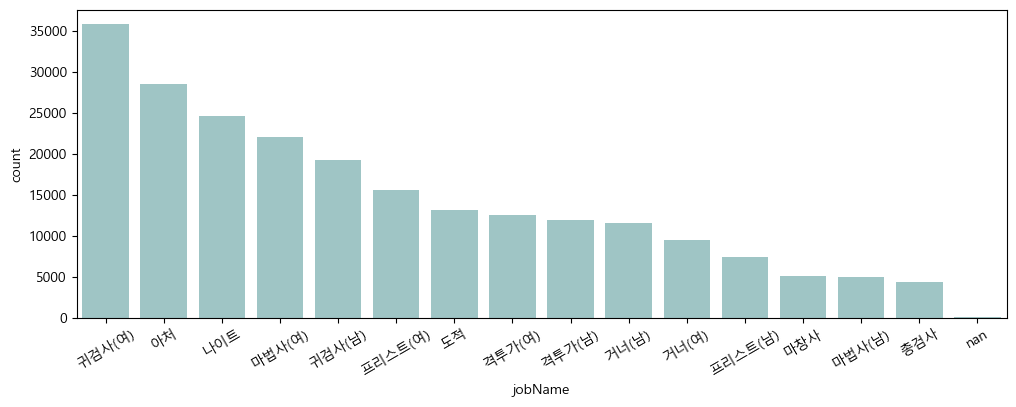

In [134]:
plt.figure(figsize=(12,4))
# plt.bar(jobdf.index, jobdf.values)
sns.barplot(data=temp, color = 'teal', alpha = 0.4)
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
plt.xticks(rotation=30)
plt.show()

직업, 부위별 아바타 경매장 건수

In [144]:
auction_avatar_table.drop(nosale_list, axis=0)['itemTypeDetail'].value_counts()

itemTypeDetail
상의       41330
하의       32103
머리       29506
신발       23090
모자       22703
스킨       21792
얼굴       21170
목가슴      18031
허리       16082
무기아바타      600
부스터         48
창            4
목걸이          2
너클           1
Name: count, dtype: int64

경매장에서 한달 내 거래건수가 100건 이상인 아바타가 가장 많은 직업

In [140]:
auction_sold_dict = table_classify_jobName(auction_avatar_table.drop(nosale_list, axis=0))
temp ={}
for job in joblist:
    c=0
    for x,y in enumerate(auction_sold_dict[job]['itemName'].value_counts()>=100):
        if y:
            c+=1
    if job in ['다크나이트', '크리에이터']:
        continue
    temp[job]=c

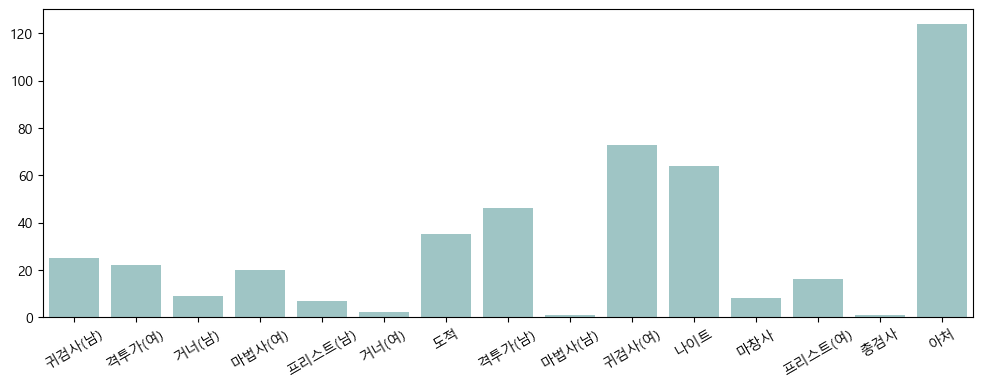

In [141]:
plt.figure(figsize=(12,4))
# plt.bar(jobdf.index, jobdf.values)
sns.barplot(data=temp, color = 'teal', alpha = 0.4)
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
plt.xticks(rotation=30)
plt.show()

5월 9일 오후 기준 SNK 콜라보 아바타 100번째 전 거래가 가장 오래된, 가장 가까운 직업

경매장에서 한달 간 거래된 직업별 아바타 목록

In [122]:
auction_sold_dict = table_classify_jobName(auction_avatar_table.drop(nosale_list, axis=0))
temp = auction_sold_dict['나이트']['itemName'].value_counts()

In [123]:
len(temp)

1700

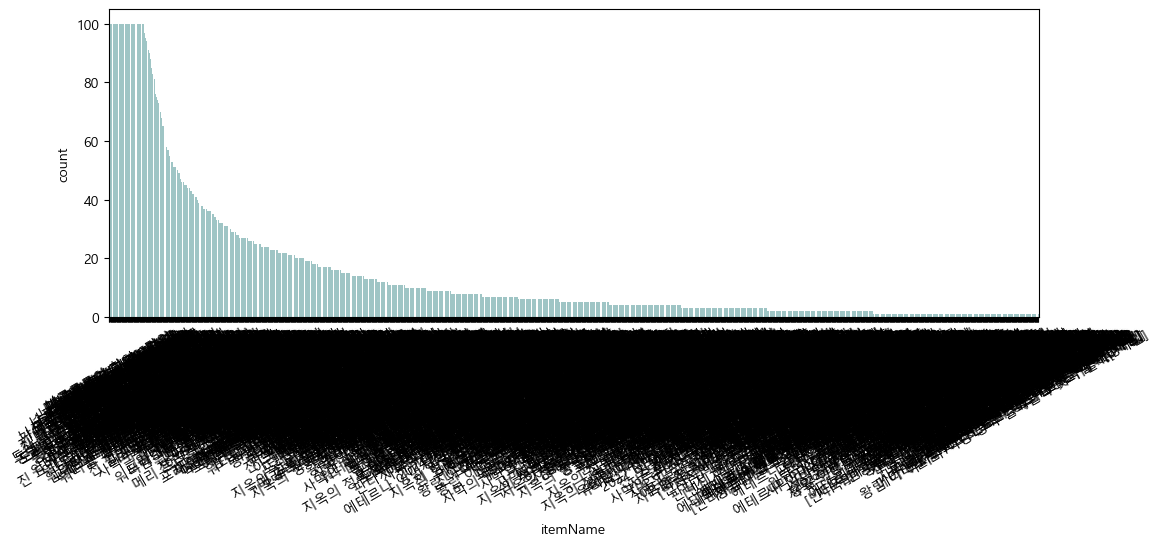

In [124]:
plt.figure(figsize=(12,4))
# plt.bar(jobdf.index, jobdf.values)
sns.barplot(data=temp, color = 'teal', alpha = 0.4)
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
plt.xticks(rotation=30)
plt.show()

In [ ]:
for x,y in enumerate(auction_sold_dict['귀검사(여)']['itemName'].value_counts()):
    if y <100:
        print()

In [116]:
auction_sold_dict['귀검사(여)']['soldDate'].value_counts()

soldDate
2024-04-29 22:16:03    3
2024-05-02 23:17:30    3
2024-05-09 15:56:44    3
2024-04-25 12:29:00    3
2024-05-08 22:35:59    3
                      ..
2024-04-09 21:24:45    1
2024-04-09 22:11:53    1
2024-04-10 00:46:25    1
2024-04-10 11:14:31    1
2024-04-11 00:28:27    1
Name: count, Length: 35408, dtype: int64

경매장에서 한달 간 거래된 귀검사(남) 아바타 목록

In [94]:
auction_sold_dict['귀검사(남)']

,soldDate,itemId,itemName,itemRarity,itemTypeDetail,count,price,unitPrice,setItemName,jobName
0,2024-04-12 23:06:59,0feb45c697a03abbe1b23b06c2e20261,염원의 귀걸이[B타입],커먼,얼굴,1,1900000,1900000,상급 아바타 세트,귀검사(남)
109,2024-05-08 14:18:16,a3128b03bc453f671c7e253ccf856ee3,여명의 천신 비단 부츠,레어,신발,1,3390000,3390000,레어 아바타 세트,귀검사(남)
110,2024-05-05 22:13:19,a3128b03bc453f671c7e253ccf856ee3,여명의 천신 비단 부츠,레어,신발,1,3620000,3620000,레어 아바타 세트,귀검사(남)
111,2024-05-05 21:58:33,a3128b03bc453f671c7e253ccf856ee3,여명의 천신 비단 부츠,레어,신발,1,3600000,3600000,레어 아바타 세트,귀검사(남)
112,2024-04-27 10:26:08,a3128b03bc453f671c7e253ccf856ee3,여명의 천신 비단 부츠,레어,신발,1,4123232,4123232,레어 아바타 세트,귀검사(남)
...,...,...,...,...,...,...,...,...,...,...
242172,2024-04-28 08:49:02,5f7e6ec0113a717628ba3abb8a1f4683,골드 셀레스티얼 페더 스폴더,레어,목가슴,1,7340000,7340000,레어 아바타 세트,귀검사(남)
242173,2024-04-11 22:46:11,5f7e6ec0113a717628ba3abb8a1f4683,골드 셀레스티얼 페더 스폴더,레어,목가슴,1,6500000,6500000,레어 아바타 세트,귀검사(남)
242174,2024-04-10 15:54:46,5f7e6ec0113a717628ba3abb8a1f4683,골드 셀레스티얼 페더 스폴더,레어,목가슴,1,4899000,4899000,레어 아바타 세트,귀검사(남)
242228,2024-05-01 00:32:31,0fe5f4d397e5914e1f2f6fd948bc560f,붕대감은 제복 코트[A타입],커먼,상의,1,1490000,1490000,상급 아바타 세트,귀검사(남)
